# Time normalisation evolution run with comparison to interpolation

Using OACs normalisation evolution feature allows us to run the simulation with only one base year input and a scaling file. This is very advantageous in terms of preserving storage and time compared to having to generate an inventory for every year <br>
Only issue right now is that although the emission values line up, the responses don't

In [1]:
import numpy as np
import xarray as xr
from import_csv import csv_to_matrix, csv_to_ncdf_comp , time_norm_ncdf
from utils.gen_toml import generate_toml
import openairclim as oac
import matplotlib.pyplot as plt

In [2]:
csv_to_ncdf_comp("aviation_emissions_data.csv",1940,1941,1)

Saved scaled emissions to inputs/mat_generated_nc_1940.nc


In [3]:
time_norm_ncdf("aviation_emissions_data.csv","test_time_norm.nc")

Saved new NetCDF to: inputs/test_time_norm.nc
Dataset summary:
<xarray.Dataset> Size: 4kB
Dimensions:       (time: 161)
Coordinates:
  * time          (time) int32 644B 1940 1941 1942 1943 ... 2097 2098 2099 2100
Data variables:
    fuel          (time) float32 644B 11.15 12.05 13.01 ... 2.61e+03 2.688e+03
    EI_CO2        (time) float32 644B 3.15 3.15 3.15 3.15 ... 3.15 3.15 3.15
    EI_NOx        (time) float32 644B 0.01222 0.01222 ... 0.01222 0.01222
    EI_H2O        (time) float32 644B 0.9936 0.9936 0.9936 ... 0.9936 0.9936
    dis_per_fuel  (time) float32 644B 0.06683 0.06683 0.06683 ... 0.1977 0.1977
Attributes:
    Title:       Time normalization 
    Convention:  CF-XXX
    Type:        norm
    Author:      Abhigyan Prakash based on OAC example


In [4]:
generate_toml(1940,2100,1,"test_time_norm.toml",scaling="norm", scale_file="test_time_norm.nc")

TOML file written to test_time_norm.toml


read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 1940 and H = 161 are outside defined time range.
read_config ln. 185 in check_config ERROR: Configuration is not valid.
read_config ln. 376 in create_output_dir INFO: Create new output directory results/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and time constraints checked successfully.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 1940.0. Reverting to 'DEFAULT' aircraft from config file.
main ln. 264 in run INFO: No subsequent species (PMO) defined in config.
main ln. 277 in run INFO: Execution time: 3.3012800216674805 sec
main ln. 280 in run WARNING: OpenAirClim is currently in development

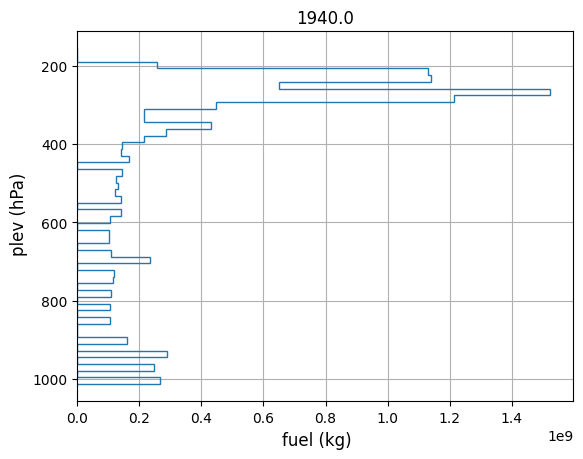

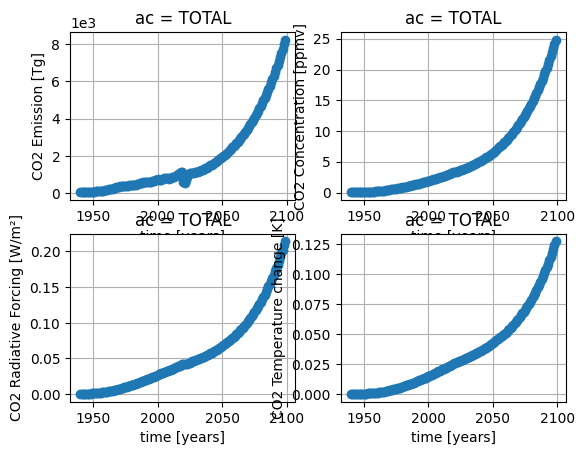

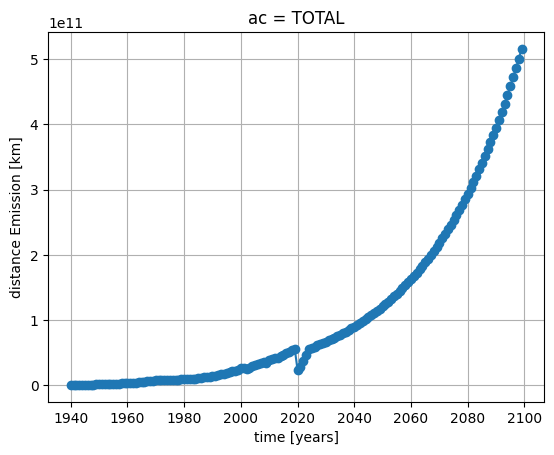

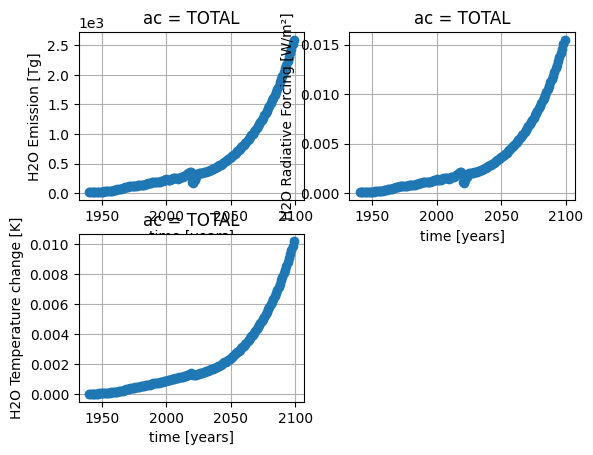

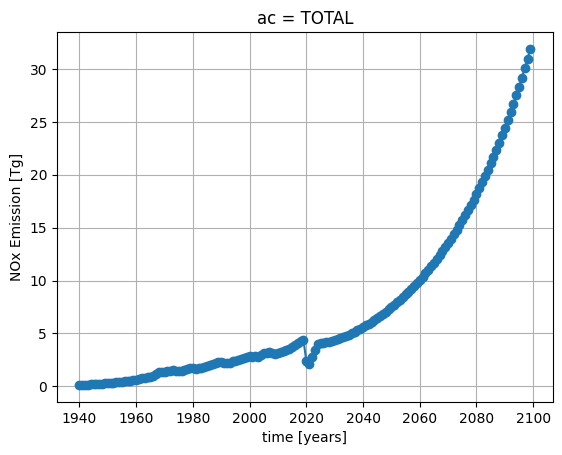

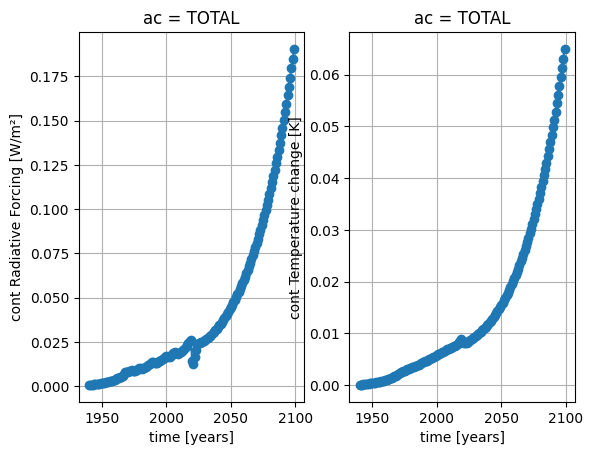

In [5]:
oac.run("tomls/test_time_norm.toml")

Saved scaled emissions to inputs/mat_generated_nc_1940.nc
Saved scaled emissions to inputs/mat_generated_nc_1945.nc
Saved scaled emissions to inputs/mat_generated_nc_1950.nc
Saved scaled emissions to inputs/mat_generated_nc_1955.nc
Saved scaled emissions to inputs/mat_generated_nc_1960.nc
Saved scaled emissions to inputs/mat_generated_nc_1965.nc
Saved scaled emissions to inputs/mat_generated_nc_1970.nc
Saved scaled emissions to inputs/mat_generated_nc_1975.nc
Saved scaled emissions to inputs/mat_generated_nc_1980.nc
Saved scaled emissions to inputs/mat_generated_nc_1985.nc
Saved scaled emissions to inputs/mat_generated_nc_1990.nc
Saved scaled emissions to inputs/mat_generated_nc_1995.nc
Saved scaled emissions to inputs/mat_generated_nc_2000.nc
Saved scaled emissions to inputs/mat_generated_nc_2005.nc
Saved scaled emissions to inputs/mat_generated_nc_2010.nc
Saved scaled emissions to inputs/mat_generated_nc_2015.nc
Saved scaled emissions to inputs/mat_generated_nc_2020.nc
Saved scaled e

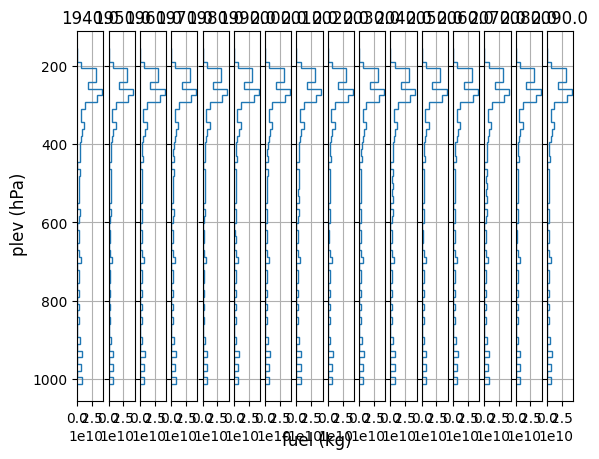

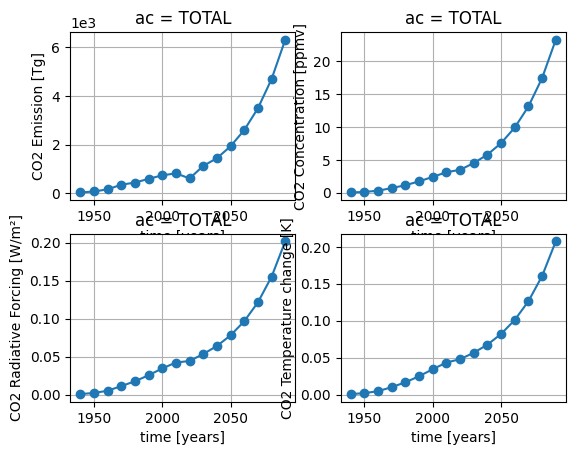

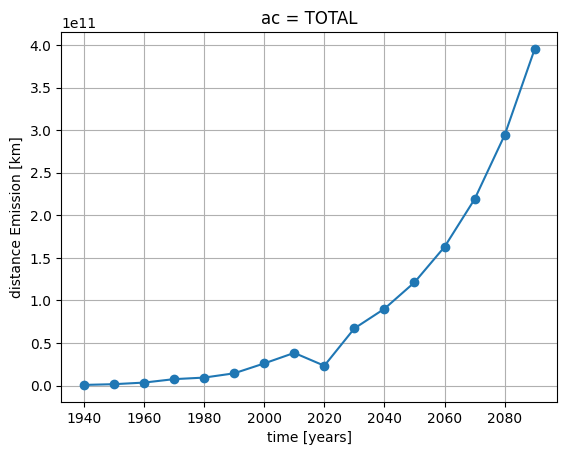

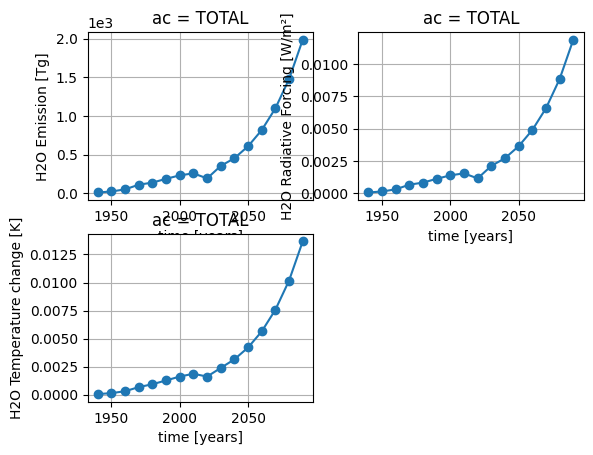

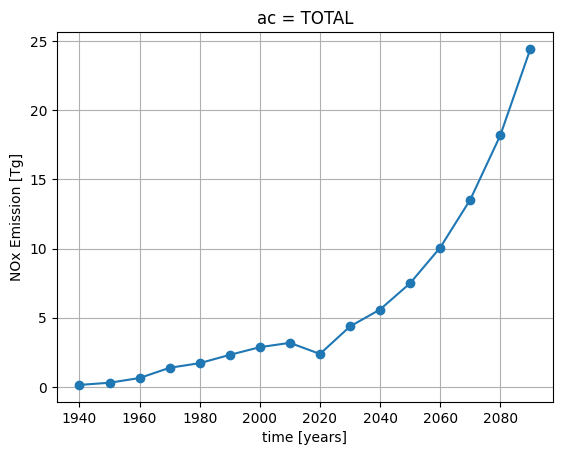

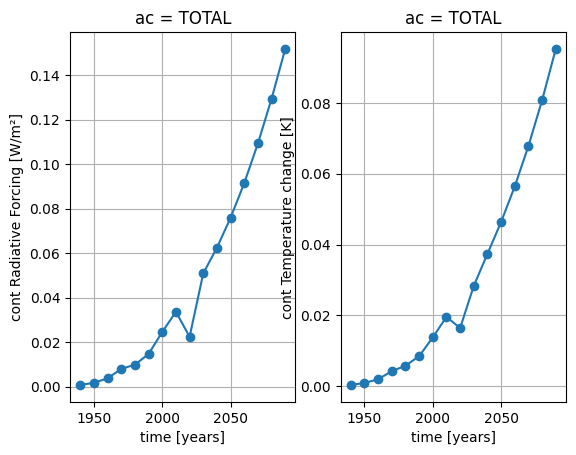

In [7]:
csv_to_ncdf_comp("aviation_emissions_data.csv",1940,2100,5)
generate_toml(1940,2100,10,"comp_ver.toml")
oac.run("tomls/comp_ver.toml")

In [3]:
comp_res = xr.load_dataset("oac_runs/comp_ver_res/gen_1940s.nc")
norm_res = xr.load_dataset("oac_runs/time_norm_res/gen_1940s.nc")

In [7]:
print(comp_res)

<xarray.Dataset> Size: 3kB
Dimensions:        (ac: 2, time: 16)
Coordinates:
  * time           (time) int64 128B 1940 1950 1960 1970 ... 2060 2070 2080 2090
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables:
    emis_CO2       (ac, time) float64 256B 35.14 75.86 ... 4.688e+03 6.301e+03
    emis_distance  (ac, time) float64 256B 7.454e+08 1.609e+09 ... 3.954e+11
    emis_H2O       (ac, time) float64 256B 11.08 23.93 ... 1.479e+03 1.987e+03
    emis_NOx       (ac, time) float64 256B 0.1363 0.2943 0.6354 ... 18.19 24.44
    conc_CO2       (ac, time) float64 256B 0.04509 0.1326 0.3175 ... 17.4 23.2
    RF_CO2         (ac, time) float64 256B 0.0007708 0.002246 ... 0.1552 0.2017
    RF_cont        (ac, time) float64 256B 0.000814 0.001756 ... 0.1294 0.1518
    RF_H2O         (ac, time) float64 256B 6.618e-05 0.0001429 ... 0.01187
    dT_CO2         (ac, time) float64 256B 0.0005871 0.001895 ... 0.1605 0.2074
    dT_cont        (ac, time) float64 256B 0.0003658 0.0009037 ... 0

In [8]:
print(norm_res)

<xarray.Dataset> Size: 29kB
Dimensions:        (ac: 2, time: 160)
Coordinates:
  * time           (time) int64 1kB 1940 1941 1942 1943 ... 2096 2097 2098 2099
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables:
    emis_CO2       (ac, time) float64 3kB 35.14 37.95 ... 7.982e+03 8.221e+03
    emis_distance  (ac, time) float64 3kB 7.454e+08 8.052e+08 ... 5.158e+11
    emis_H2O       (ac, time) float64 3kB 11.08 11.97 ... 2.518e+03 2.593e+03
    emis_NOx       (ac, time) float64 3kB 0.1363 0.1472 0.159 ... 30.96 31.89
    conc_CO2       (ac, time) float64 3kB 0.004509 0.009134 ... 24.14 24.84
    RF_CO2         (ac, time) float64 3kB 7.708e-05 0.000156 ... 0.2083 0.2141
    RF_cont        (ac, time) float64 3kB 0.000814 0.0008792 ... 0.1849 0.1905
    RF_H2O         (ac, time) float64 3kB 6.618e-05 7.149e-05 ... 0.01549
    dT_CO2         (ac, time) float64 3kB 5.871e-06 1.71e-05 ... 0.1237 0.1271
    dT_cont        (ac, time) float64 3kB 3.658e-05 7.204e-05 ... 0.0631 0.064

<xarray.DataArray 'emis_NOx' (time: 16)> Size: 128B
array([0.99999996, 0.99999992, 1.        , 0.99999998, 0.99999995,
       0.99999983, 1.00000005, 1.        , 0.99999997, 0.99999997,
       0.99999995, 0.99999994, 0.99999998, 0.99999998, 1.00000004,
       0.99999989])
Coordinates:
  * time     (time) int64 128B 1940 1950 1960 1970 1980 ... 2060 2070 2080 2090
    ac       <U7 28B 'TOTAL'


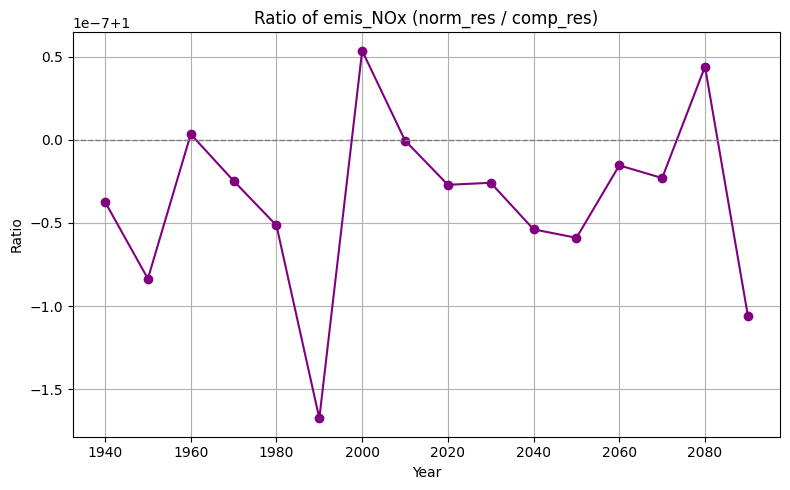

In [9]:
comp_nox = comp_res["emis_NOx"].sel(ac="TOTAL")
norm_nox = norm_res["emis_NOx"].sel(ac="TOTAL")

# Align on common years (just in case time coordinates differ)
comp_nox, norm_nox = xr.align(comp_nox, norm_nox, join="inner")

# Compute ratio
ratio =  comp_nox /norm_nox 
print(ratio)
# Plot
plt.figure(figsize=(8,5))
plt.plot(ratio["time"], ratio, marker='o', color='purple')
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.title("Ratio of emis_NOx (norm_res / comp_res)")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

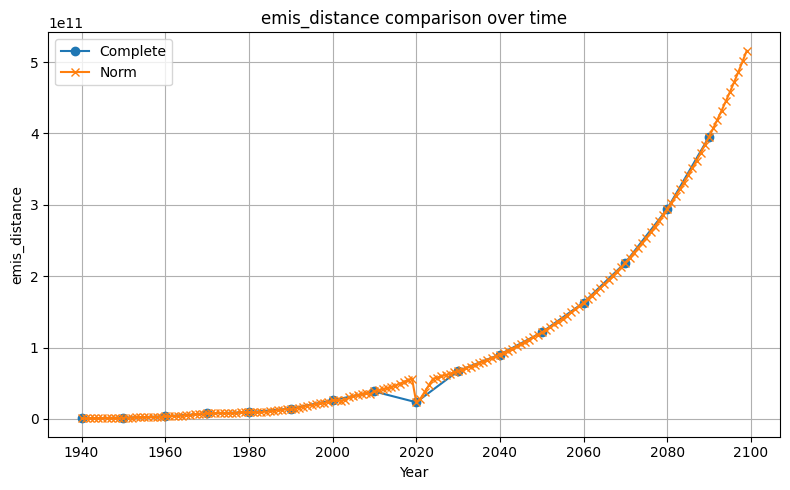

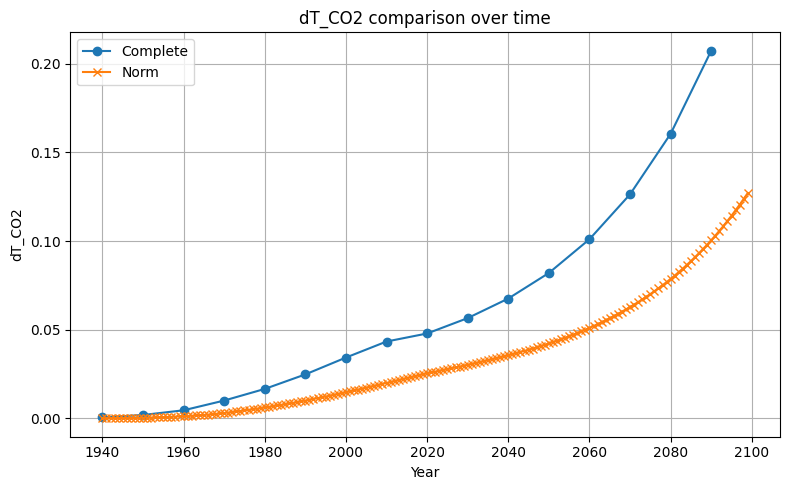

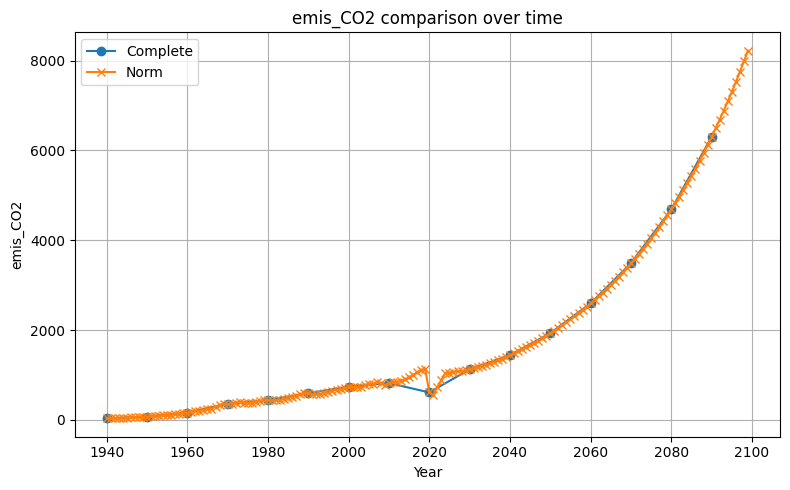

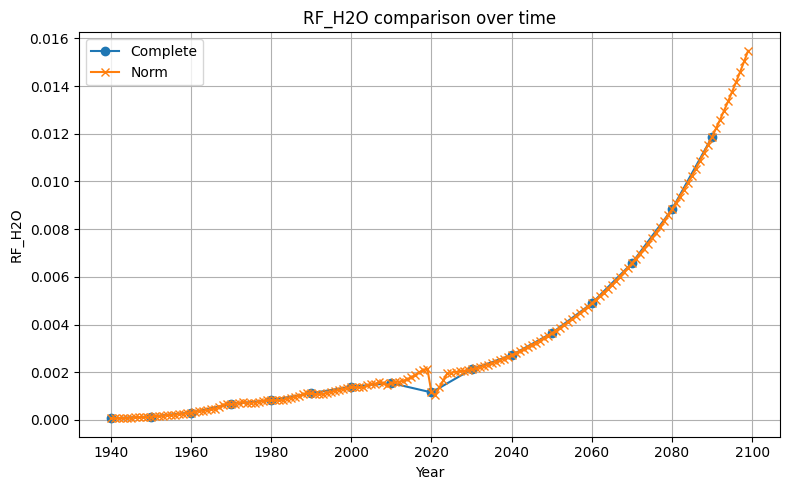

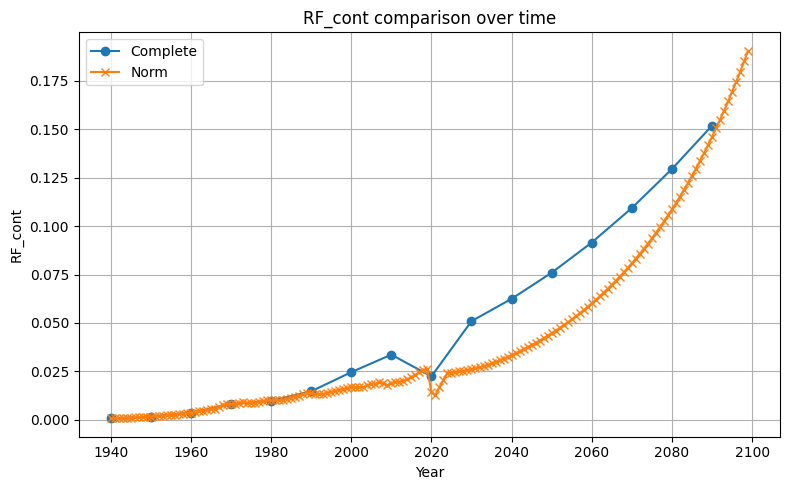

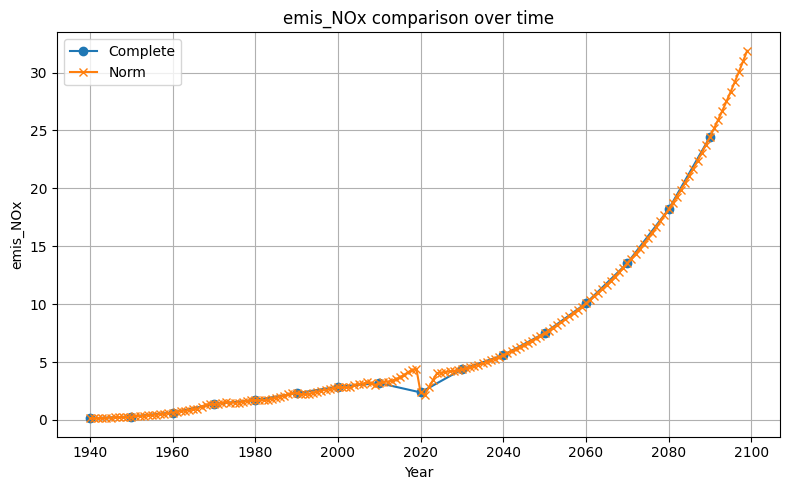

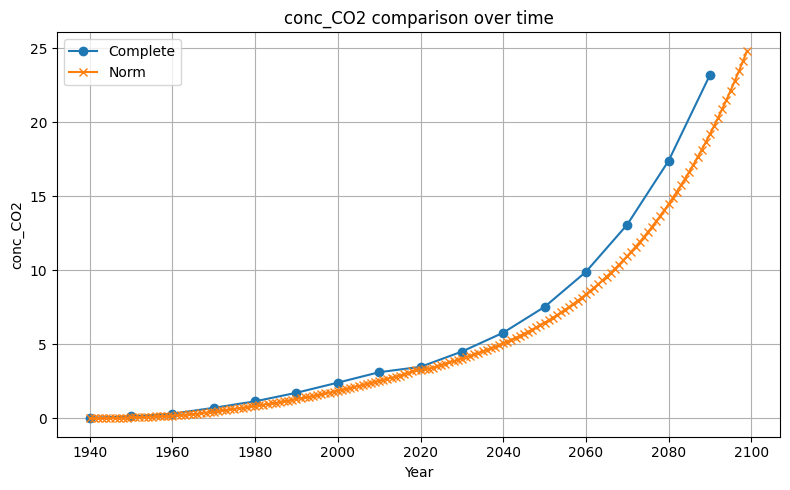

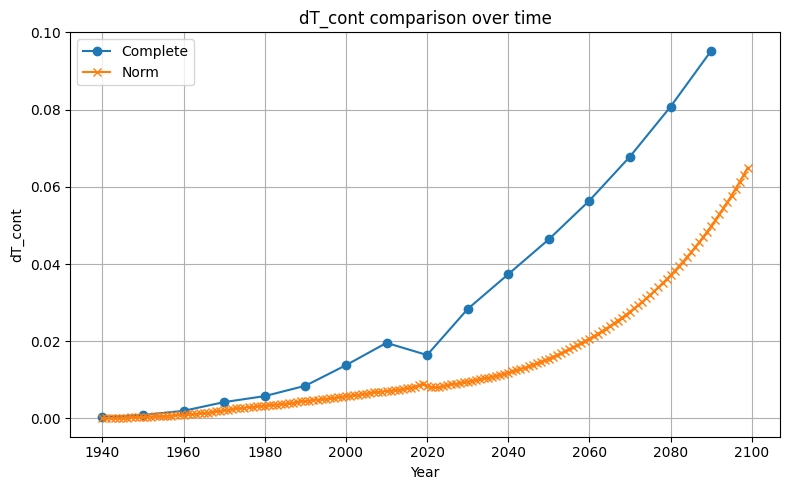

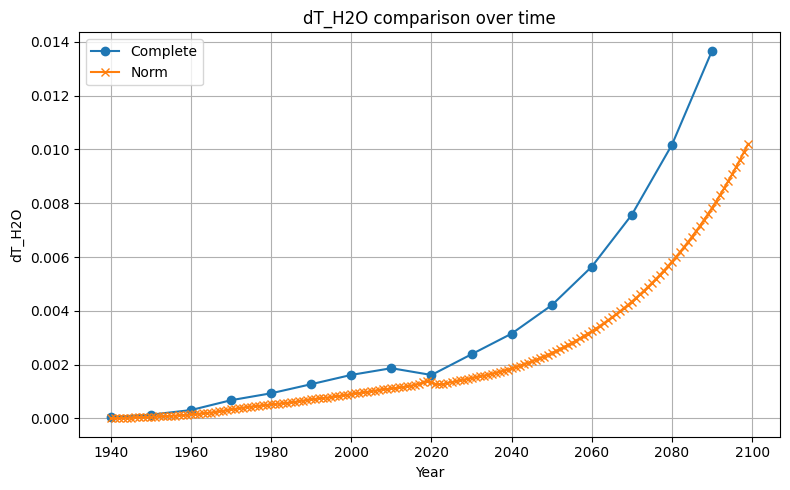

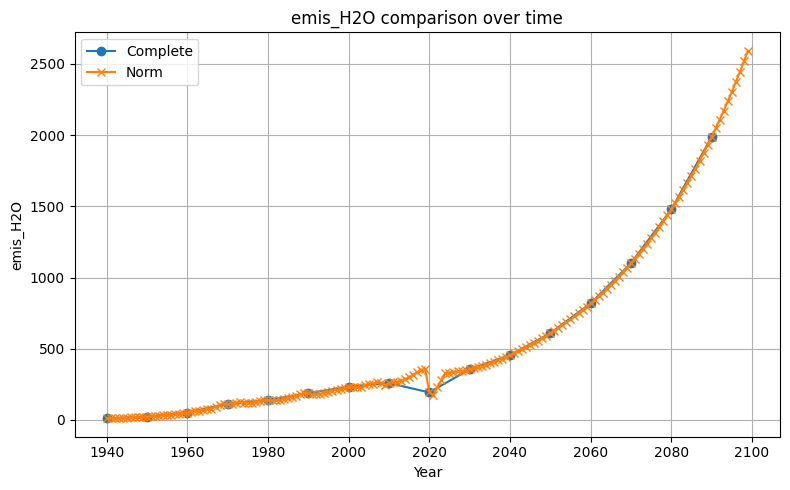

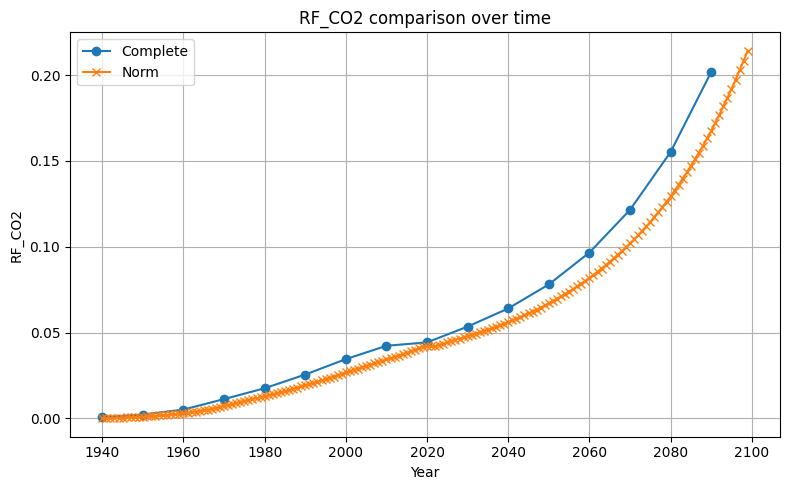

In [10]:
variables = list(set(comp_res.data_vars) & set(norm_res.data_vars))


for var in variables:
    plt.figure(figsize=(8, 5))
    
    
    comp_data = comp_res[var].sel(ac="TOTAL")
    norm_data = norm_res[var].sel(ac="TOTAL")

    plt.plot(comp_data["time"], comp_data, label="Complete", marker='o')
    plt.plot(norm_data["time"], norm_data, label="Norm", marker='x')

   
    plt.title(f"{var} comparison over time")
    plt.xlabel("Year")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    
    plt.show()